In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import main_LSTM as LSTM

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import Load_data as ld

In [3]:
from keras.models import load_model

In [4]:
def show_img(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

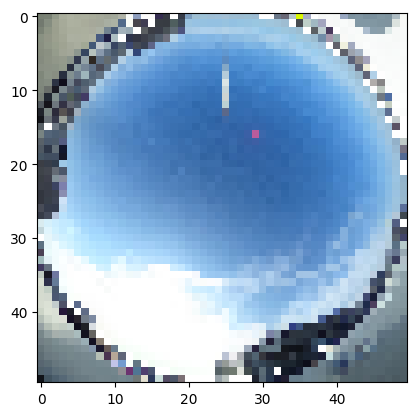

In [9]:
img_path = '../data/PV_IMAGE/201611/20161117_IT_resampled_northup/20161117T131759_IT.png'
img_tmp = Image.open(img_path)
img_tmp = img_tmp.resize((50, 50))
img_tmp = np.asarray(img_tmp, dtype=np.uint8)
show_img(img_tmp)

In [3]:
SAVE_dir = "./RESULT/tmp"
def make_date():
    '''
    人工データの作成。
    '''
    # test
    time = 15
    row = 80
    col = 80
    filters = 1
    training = 1200
    train = np.zeros((training, time, row, col, 1), dtype=np.float)
    gt = np.zeros((training, time, row, col, 1), dtype=np.float)
    # for i in range(1000):
    #    gt[::,0,0,0] = np.random.random()

    for i in range(training):
        n = np.random.randint(3, 8)
        # n=15
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            directionx = np.random.randint(0, 3) - 1
            gravity = 0  # np.random.randint(0,3) - 1
            w = np.random.randint(2, 4)
            # rint directionx,directiony
            for t in range(time):
                # w = 2
                train[i, t, xstart + directionx * t - w:xstart + directionx * t + w,
                      ystart + directiony * t + int(0.1 * gravity * t**2) - w:ystart + directiony * t + int(0.1 * gravity * t**2) + w, 0] += 1

                # Make it more robust
                # Noise
                if np.random.randint(0, 2):
                    train[i, t, xstart + directionx * t - w - 1:xstart + directionx * t + w + 1,
                          ystart + directiony * t + int(0.1 * gravity * t**2) - w - 1:ystart + directiony * t + int(0.1 * gravity * t**2) + w + 1, 0] += 0.1

                if np.random.randint(0, 2):
                    train[i, t, xstart + directionx * t - w + 1:xstart + directionx * t + w - 1,
                          ystart + directiony * t + int(0.1 * gravity * t**2) + w - 1:ystart + directiony * t + int(0.1 * gravity * t**2) + w - 1, 0] -= 0.1

                gt[i, t, xstart + directionx * (t + 1) - w:xstart + directionx * (t + 1) + w,
                   ystart + directiony * (t + 1) + int(0.1 * gravity * (t + 1)**2) - w:ystart + directiony * (t + 1) + int(0.1 * gravity * (t + 1)**2) + w, 0] += 1

    train = train[::, ::, 20:60, 20:60, ::]
    gt = gt[::, ::, 20:60, 20:60, ::]
    train[train >= 1] = 1
    gt[gt >= 1] = 1
    return train, gt

In [151]:
train, gt = make_date()

(1200, 15, 40, 40, 1)


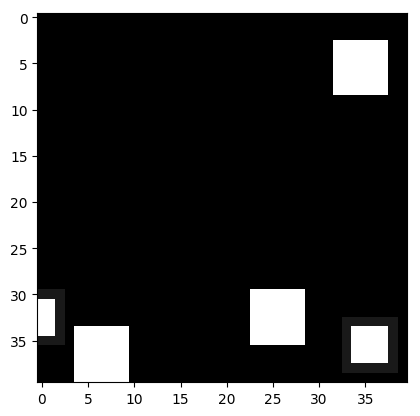

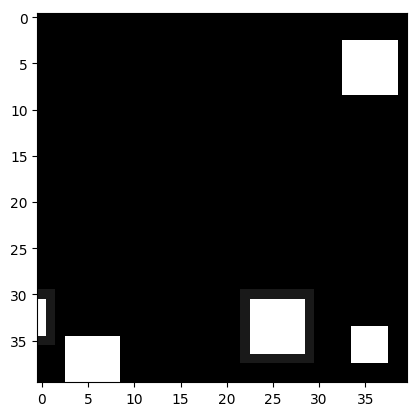

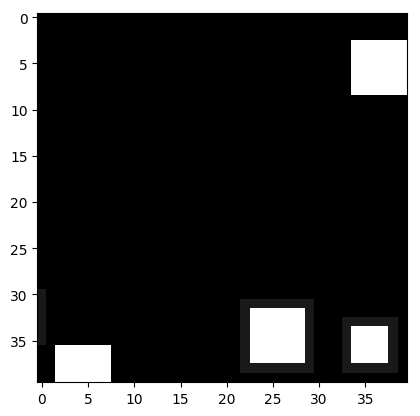

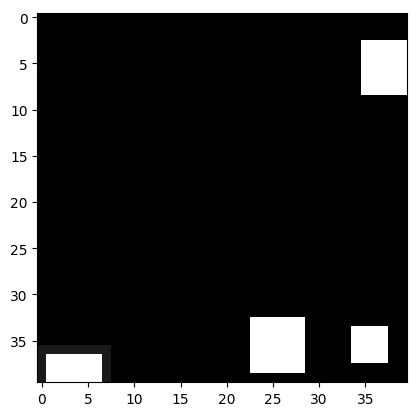

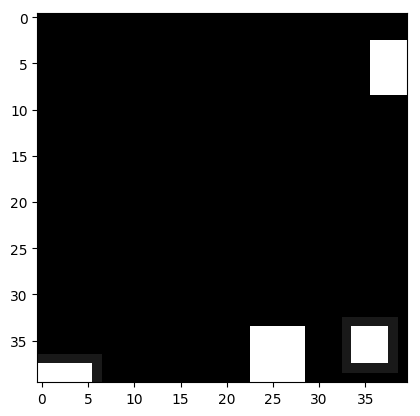

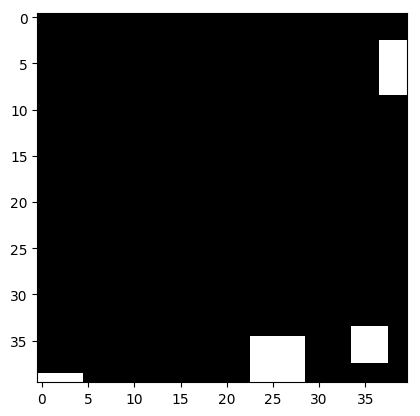

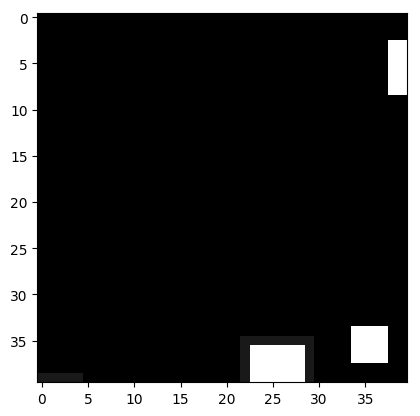

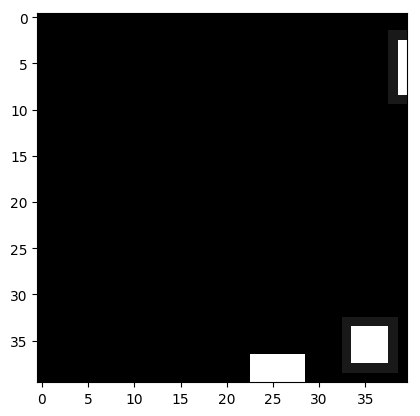

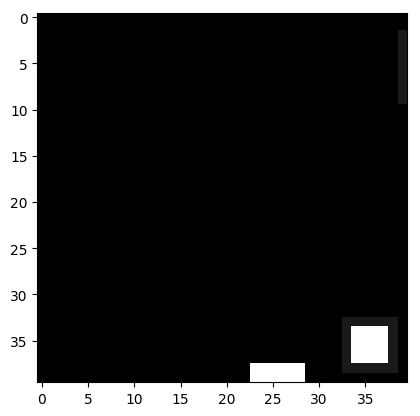

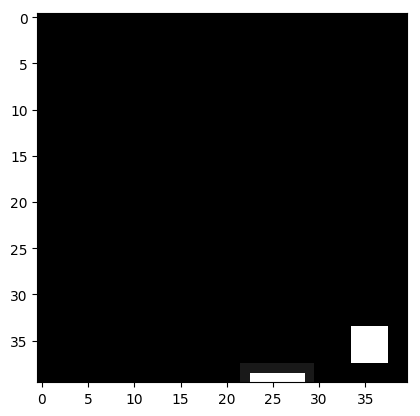

In [20]:
print(train.shape)

plt.clf()
for i in range(10):
    tmp = train[0, i, :, :, 0]
    plt.figure()
    plt.imshow(tmp, cmap="gray", interpolation="none")
    plt.show()

In [145]:
model = "./RESULT/test_失敗/LSTM_test_2017_10_27/model_test_set.h5"
model = load_model(model)
img_test = train[1004]

In [165]:
import imp
imp.reload(LSTM)

<module 'main_LSTM' from '/Users/yukiota/solar_project/solar_LSTM/main_LSTM.py'>

In [62]:
border = np.ones((tmp.shape[0], 10))
tmp2 = np.concatenate((tmp, border, tmp), axis=1)
tmp2 = tmp2.repeat(5, axis=0).repeat(5, axis=1)

plt.clf()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.imshow(tmp, cmap="gray", interpolation="none")
ax.text(37, 3, "Initial Time", color="white", fontdict={"fontsize": 15,"fontweight":'bold',"ha":"right","va":"center"})
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(122)
ax.text(37, 3, "Ground Truth", color="white", fontdict={"fontsize": 15,"fontweight":'bold',"ha":"right","va":"center"})
ax.imshow(tmp, cmap="gray", interpolation="none")
plt.xticks([])
plt.yticks([])

plt.savefig("testes.png", cmap="gray", interpolation="none")

In [142]:
print(img_test.shape)
new_pos =model.predict(img_test[np.newaxis, :10, :, :, :])
print(img_test[np.newaxis, :10, :, :, :].shape)
print(new_pos.shape)
# new_pos[0, -1, :, :, :]

(15, 40, 40, 1)
(1, 10, 40, 40, 1)
(1, 10, 40, 40, 1)


In [166]:
plt.clf()
LSTM.predict_convLSTM2D(model, img_test, SAVE_dir, date="test", start=0)

start predicting from 0 to 10
(10, 40, 40, 1) (40, 40, 1)
(11, 40, 40, 1) (40, 40, 1)
(12, 40, 40, 1) (40, 40, 1)
(13, 40, 40, 1) (40, 40, 1)
(14, 40, 40, 1) (40, 40, 1)
(15, 40, 40, 1) (40, 40, 1)
(16, 40, 40, 1) (40, 40, 1)
(17, 40, 40, 1) (40, 40, 1)
(18, 40, 40, 1) (40, 40, 1)
(19, 40, 40, 1) (40, 40, 1)
(20, 40, 40, 1) (40, 40, 1)
(21, 40, 40, 1) (40, 40, 1)
(22, 40, 40, 1) (40, 40, 1)
(23, 40, 40, 1) (40, 40, 1)
(24, 40, 40, 1) (40, 40, 1)
(25, 40, 40, 1) (40, 40, 1)


/Users/yukiota/.pyenv/versions/anaconda3-4.4.0/envs/local_py3_cv/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [173]:
tmp = img_test[:10:] - img_test[:10]
tmp.mean()

0.0

# convLSTMの重みを読み込む

In [14]:
# イメージディレクトリの読み込み
img_dir = '../data/PV_IMAGE/201705/20170518_IT_resampled_northup/'
img_0518 = ld.load_image(imgdir=img_dir, size=(50, 50), norm=True, median=True)

---------- Image Load Done


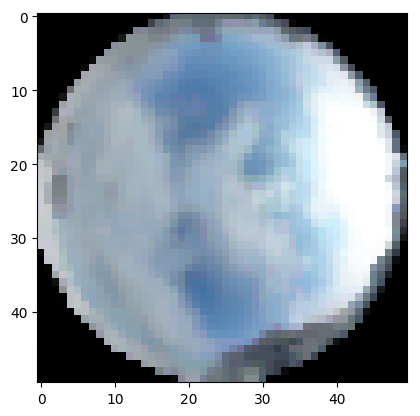

In [15]:
show_img(img_0518[60])

In [16]:
# モデルの読み込み
model = "./RESULT/2017_11_18/model_20170518.h5"
model = load_model(model)

In [25]:
array_steps = LSTM.array2LSTM(img_0518, num_frame=15)

add new axis


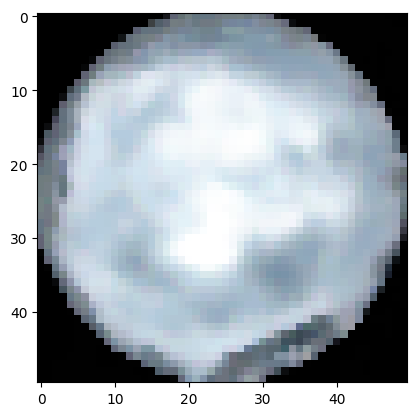

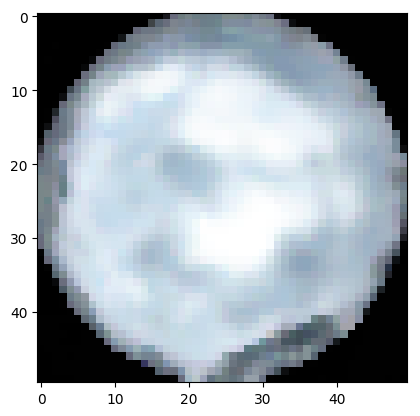

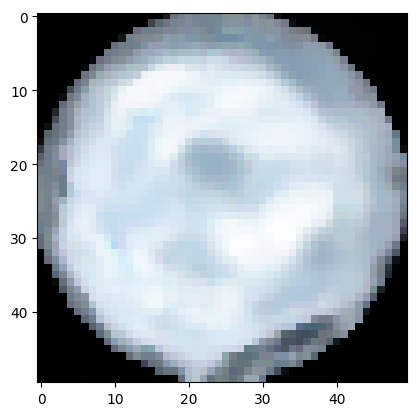

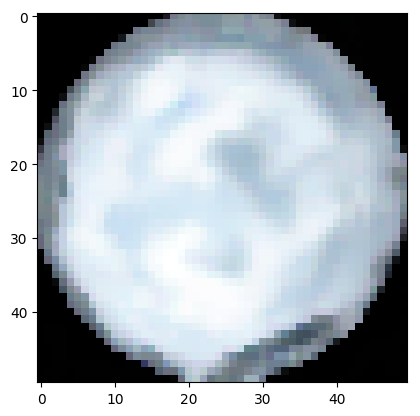

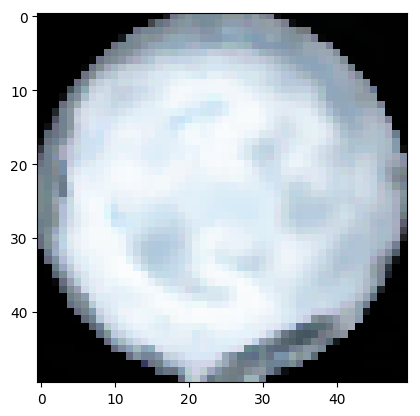

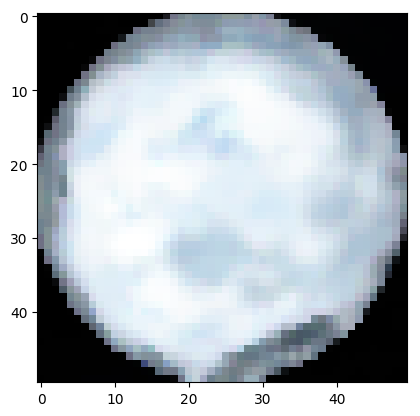

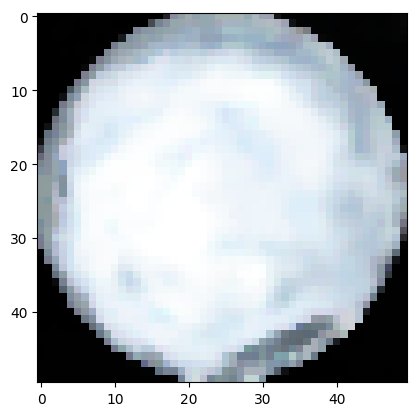

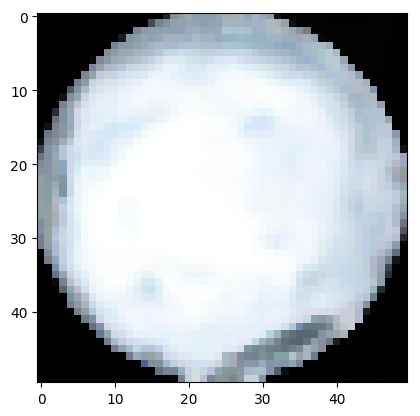

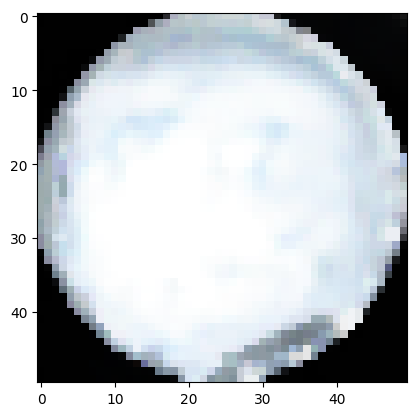

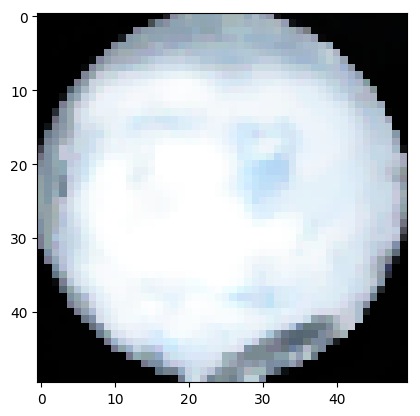

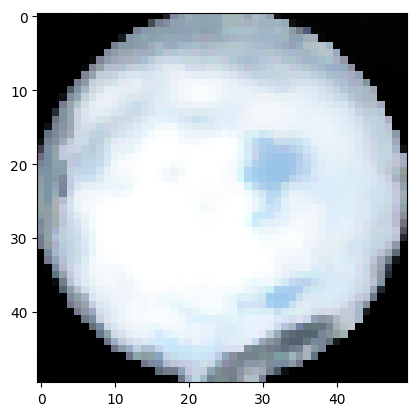

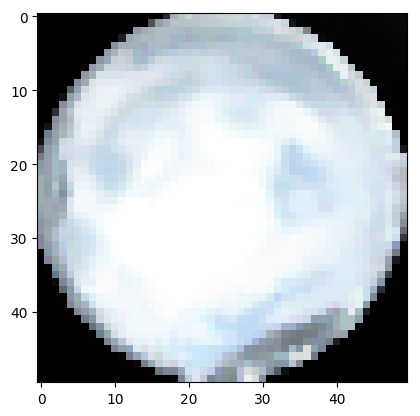

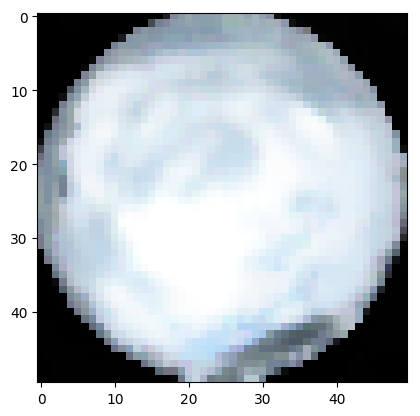

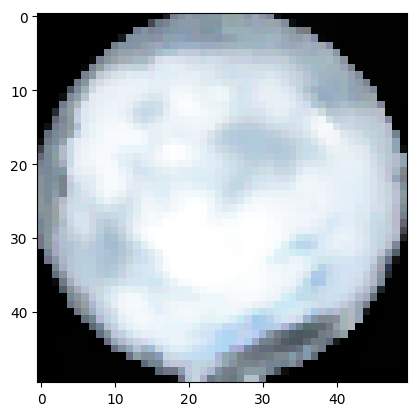

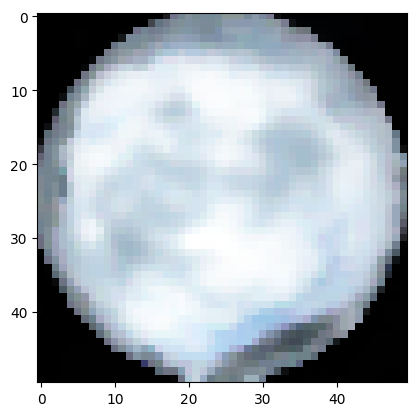

In [42]:
for i in range(array_steps.shape[1]):
     show_img(array_steps[200][i])

In [43]:
array_steps.shape

(346, 15, 50, 50, 3)

In [89]:
plt.clf()
save_dir = './RESULT/tmp/'
img_pred = LSTM.predict_convLSTM2D(model, img_0518, save_dir, date='0518', start=30, return_array=True)

start predicting from 30 to 40
(10, 50, 50, 3) (50, 50, 3)
(11, 50, 50, 3) (50, 50, 3)
(12, 50, 50, 3) (50, 50, 3)
(13, 50, 50, 3) (50, 50, 3)
(14, 50, 50, 3) (50, 50, 3)
(15, 50, 50, 3) (50, 50, 3)
(16, 50, 50, 3) (50, 50, 3)
(17, 50, 50, 3) (50, 50, 3)
(18, 50, 50, 3) (50, 50, 3)
(19, 50, 50, 3) (50, 50, 3)
(20, 50, 50, 3) (50, 50, 3)
(21, 50, 50, 3) (50, 50, 3)
(22, 50, 50, 3) (50, 50, 3)
(23, 50, 50, 3) (50, 50, 3)
(24, 50, 50, 3) (50, 50, 3)
(25, 50, 50, 3) (50, 50, 3)


In [91]:
array_pred = np.asarray(img_pred)
print(array_pred.shape)
print(array_pred[0].mean())

(15, 50, 50, 3)
0.205518


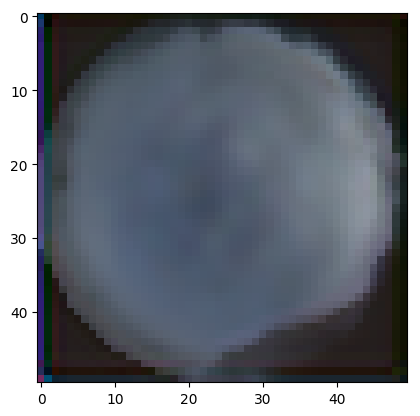

[[[ 0.          0.22859979  0.38461548]
  [ 0.00170401  0.05474179  0.        ]
  [ 0.1500499   0.04966806  0.02561817]
  ..., 
  [ 0.11391336  0.08147317  0.0349728 ]
  [ 0.11019193  0.10175024  0.01065908]
  [ 0.1480532   0.05788117  0.03768061]]

 [[ 0.11094323  0.22062072  0.43494922]
  [ 0.          0.02938057  0.        ]
  [ 0.16754779  0.06551587  0.07063323]
  ..., 
  [ 0.11341082  0.0732026   0.05161913]
  [ 0.08088844  0.09574128  0.01136369]
  [ 0.04893251  0.04166789  0.        ]]

 [[ 0.1523678   0.14064798  0.42335123]
  [ 0.          0.13085425  0.        ]
  [ 0.16540179  0.09741953  0.07566112]
  ..., 
  [ 0.13519192  0.09310445  0.08243553]
  [ 0.09231725  0.08172978  0.01969321]
  [ 0.06936087  0.0659847   0.00660897]]

 ..., 
 [[ 0.24732596  0.10347828  0.32561433]
  [ 0.          0.17209119  0.1130667 ]
  [ 0.20488587  0.08963531  0.10502395]
  ..., 
  [ 0.15738091  0.10457721  0.1264042 ]
  [ 0.10031413  0.08365908  0.05323793]
  [ 0.05816676  0.07685219  0.06075

In [93]:
tmp = array_pred[10]
# tmp = tmp[0:1, 0:1, :]
# tmp[tmp <= 0] = 0
tmp.shape
show_img(tmp)
print(tmp)